# Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# K-MEANS for Classifcation (Only *canceled, nummericals*)

In [2]:
# load ML dataset
df_kmeans = pd.read_csv('https://raw.githubusercontent.com/FlorianMuehlbauer24/Final-Project-Bart-Flo/main/df_numerical_ml.csv')


In [3]:
df_kmeans.shape

(44157, 12)

In [4]:
# Scale
scaler = StandardScaler()
scaler.fit(df_kmeans)
df_scaled = scaler.transform(df_kmeans)

In [5]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1234)

In [6]:
clusters = kmeans.predict(df_scaled)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    32832
1      162
2    11163
dtype: int64

In [7]:
df_scaled = pd.DataFrame(df_scaled)

# Cluster visalization

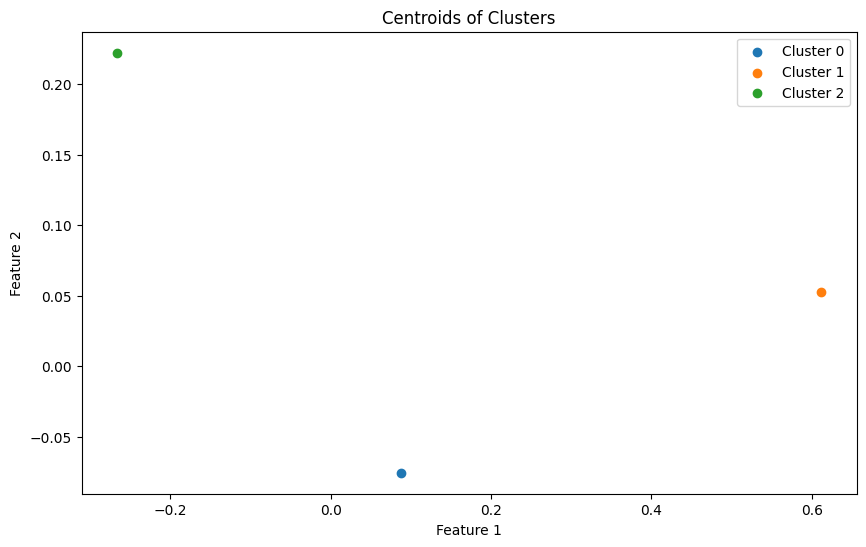

                0         1         2         3         4         5         6  \
Cluster                                                                         
0        0.087690 -0.075665 -0.240043 -0.211879 -0.348360 -0.228470 -0.249053   
1        0.611949  0.052972 -0.259134 -0.889230 -0.383075  0.092360  0.036161   
2       -0.266789  0.221774  0.709761  0.636070  1.030136  0.670624  0.731977   

                 7         8         9        10   11  
Cluster                                                
0        -0.031946 -0.015245 -0.144058  0.055943  0.0  
1        15.095710  4.654102 -0.204238  0.003084  0.0  
2        -0.125116 -0.022702  0.426660 -0.164581  0.0  


In [8]:
clusters = kmeans.predict(df_scaled)

df_with_clusters = df_scaled.copy()
df_with_clusters['Cluster'] = clusters

centroids = kmeans.cluster_centers_

# Visualize centroids
plt.figure(figsize=(10, 6))
for i in range(len(centroids)):
    plt.scatter(centroids[i][0], centroids[i][1], label='Cluster {}'.format(i))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Centroids of Clusters')
plt.legend()
plt.show()

# Feature Analysis
cluster_means = df_with_clusters.groupby('Cluster').mean()
print(cluster_means)


In [9]:
df_audiance = pd.DataFrame(df_scaled)
df_audiance["cluster"] = clusters

In [10]:
df_audiance.head()

,0,1,2,3,4,5,6,7,8,9,10,11,cluster
0,-0.505006,0.144053,-0.259134,-0.438210,1.034831,-0.918623,0.233386,-0.156092,-0.036051,-0.217922,-0.165989,0.0,0
1,-0.589297,0.144053,-0.259134,0.008922,-0.506785,-0.918623,0.233386,-0.156092,-0.036051,-0.217922,-0.165989,0.0,0
2,-1.027608,0.144053,-0.259134,0.341893,-0.506785,-0.918623,0.765894,-0.156092,-0.036051,-0.217922,-0.165989,0.0,0
3,-0.715733,0.144053,-0.259134,0.037462,2.576447,1.066580,1.298402,-0.156092,-0.036051,-0.217922,-0.165989,0.0,2
4,-0.412286,0.144053,-0.259134,0.062197,2.576447,1.066580,2.895926,-0.156092,-0.036051,-0.217922,-0.165989,0.0,2


# Audience analysis based on K-means clusters

## Transfer values from clusters to eda df

In [11]:
# not encoded DF
df_eda_canceled = pd.read_csv('https://raw.githubusercontent.com/FlorianMuehlbauer24/Final-Project-Bart-Flo/main/df_eda_canceled.csv')

In [12]:
# taking cluster valus from encoded df
df_eda_canceled["cluster"] = df_audiance["cluster"]
df_eda_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,weekday_reservation,cluster
0,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,Canceled,Friday,0
1,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,Canceled,Wednesday,0
2,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,No Deposit,0,Transient,123.0,0,0,Canceled,Tuesday,0
3,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,0,No Deposit,0,Transient,107.0,0,2,Canceled,Thursday,2
4,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,0,No Deposit,0,Transient,108.3,0,2,Canceled,Friday,2


## Descriptive statistics in python

In [13]:
# cluster number 1
cluster_1 = df_eda_canceled[df_eda_canceled['cluster'] == 0]
cluster_1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,cluster
count,32832.0,32832.000000,32832.000000,32832.000000,32832.000000,32832.000000,32832.000000,32832.000000,32832.000000,32832.000000,32832.000000,32832.000000,32832.000000,32832.000000,32832.000000,32832.000000,32832.0,32832.000000,32832.0
mean,1.0,155.315698,2016.114766,27.053210,15.705562,0.695297,2.094024,1.851090,0.007858,0.000853,0.014864,0.165509,0.014102,0.033321,4.772509,93.895341,0.0,0.102766,0.0
std,0.0,125.922441,0.712301,13.334409,8.721942,0.804176,1.145432,0.434388,0.089328,0.029191,0.121009,0.392841,0.314168,0.203944,24.800329,34.763358,0.0,0.316813,0.0
min,1.0,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,1.0,53.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.607500,0.0,0.000000,0.0
50%,1.0,122.000000,2016.000000,26.000000,16.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.0,0.000000,0.0
75%,1.0,243.000000,2017.000000,39.000000,23.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114.300000,0.0,0.000000,0.0
max,1.0,629.000000,2017.000000,53.000000,31.000000,4.000000,8.000000,6.000000,2.000000,1.000000,1.000000,11.000000,16.000000,4.000000,391.000000,382.000000,0.0,2.000000,0.0


In [14]:
cluster_1_nummericals = cluster_1[['lead_time', 'average_daily_rate',
                     'total_of_special_requests', 'stays_in_weekend_nights',
                     'stays_in_week_nights', 'previous_cancellations']]
cluster_1_nummericals.mean()

lead_time                    155.315698
average_daily_rate            93.895341
total_of_special_requests      0.102766
stays_in_weekend_nights        0.695297
stays_in_week_nights           2.094024
previous_cancellations         0.165509
dtype: float64

In [15]:
cluster_1_nominal = cluster_1[['hotel', 'is_canceled', 'country', 'market_segment', 'distribution_channel','is_repeated_guest','deposit_type','customer_type','adults','children','babies','booking_changes']]

In [16]:
mode_values_1 = cluster_1_nominal.mode()
mode_values_1

,hotel,is_canceled,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,customer_type,adults,children,babies,booking_changes
0,City Hotel,1,PRT,Groups,TA/TO,0,No Deposit,Transient,2,0.0,0,0


In [17]:
# cluster number 2
cluster_2 = df_eda_canceled[df_eda_canceled['cluster'] == 1]

In [18]:
cluster_2_nominal = cluster_2[['hotel', 'is_canceled', 'country', 'market_segment', 'distribution_channel','is_repeated_guest','deposit_type','customer_type','adults','children','babies','booking_changes']]
mode_values_2 = cluster_2_nominal.mode()
mode_values_2

,hotel,is_canceled,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,customer_type,adults,children,babies,booking_changes
0,Resort Hotel,1,PRT,Groups,TA/TO,0,Non Refund,Transient,2,0.0,0,0


In [19]:
cluster_2_nummericals = cluster_2[['lead_time', 'average_daily_rate',
                     'total_of_special_requests', 'stays_in_weekend_nights',
                     'stays_in_week_nights', 'previous_cancellations']]
cluster_2_nummericals.mean()

lead_time                    217.512346
average_daily_rate            58.295679
total_of_special_requests      0.080247
stays_in_weekend_nights        1.018519
stays_in_week_nights           2.629630
previous_cancellations        20.333333
dtype: float64

In [20]:
# cluster number 3
cluster_3 = df_eda_canceled[df_eda_canceled['cluster'] == 2]

In [21]:
cluster_3_nominal = cluster_3[['hotel', 'is_canceled', 'country', 'market_segment', 'distribution_channel','is_repeated_guest','deposit_type','customer_type','adults','children','babies','booking_changes']]
mode_values_3 = cluster_3_nominal.mode()
mode_values_3

,hotel,is_canceled,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,customer_type,adults,children,babies,booking_changes
0,City Hotel,1,PRT,Online TA,TA/TO,0,No Deposit,Transient,2,0.0,0,0


In [22]:
cluster_3_nummericals = cluster_3[['lead_time', 'average_daily_rate',
                     'total_of_special_requests', 'stays_in_weekend_nights',
                     'stays_in_week_nights', 'previous_cancellations']]
cluster_3_nummericals.mean()

lead_time                    113.261399
average_daily_rate           138.461135
total_of_special_requests      0.996954
stays_in_weekend_nights        1.601093
stays_in_week_nights           3.936307
previous_cancellations         0.041297
dtype: float64

In [ ]:
cluster_1_nummericals.mean()

lead_time                    155.315698
average_daily_rate            93.895341
total_of_special_requests      0.102766
stays_in_weekend_nights        0.695297
stays_in_week_nights           2.094024
previous_cancellations         0.165509
dtype: float64

In [ ]:
cluster_2_nummericals.mean()

lead_time                    217.512346
average_daily_rate            58.295679
total_of_special_requests      0.080247
stays_in_weekend_nights        1.018519
stays_in_week_nights           2.629630
previous_cancellations        20.333333
dtype: float64

In [ ]:
cluster_3_nummericals.mean()

lead_time                    113.261399
average_daily_rate           138.461135
total_of_special_requests      0.996954
stays_in_weekend_nights        1.601093
stays_in_week_nights           3.936307
previous_cancellations         0.041297
dtype: float64

In [ ]:
mode_values_1

,hotel,is_canceled,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,customer_type,adults,children,babies,booking_changes
0,City Hotel,1,PRT,Groups,TA/TO,0,No Deposit,Transient,2,0.0,0,0


In [ ]:
mode_values_2

,hotel,is_canceled,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,customer_type,adults,children,babies,booking_changes
0,Resort Hotel,1,PRT,Groups,TA/TO,0,Non Refund,Transient,2,0.0,0,0


In [ ]:
mode_values_3

,hotel,is_canceled,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,customer_type,adults,children,babies,booking_changes
0,City Hotel,1,PRT,Online TA,TA/TO,0,No Deposit,Transient,2,0.0,0,0


In [ ]:
df_eda_canceled.to_csv('df_eda_canceled_for_visualization.csv', index=False)